# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='
counter = 1

citycity = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

print('********************************')
print('City Number and Name Information')
print('********************************')

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        citycity.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f'City Number - {counter} | City Name - {city}')
        counter = counter + 1
    except KeyError:
        print('City Not Found')

********************************
City Number and Name Information
********************************
City Number - 1 | City Name - arman
City Number - 2 | City Name - ushuaia
City Number - 3 | City Name - cape town
City Number - 4 | City Name - rikitea
City Number - 5 | City Name - axim
City Number - 6 | City Name - upernavik
City Number - 7 | City Name - port alfred
City Number - 8 | City Name - saint-philippe
City Number - 9 | City Name - butaritari
City Number - 10 | City Name - castro
City Number - 11 | City Name - cabo san lucas
City Number - 12 | City Name - hithadhoo
City Number - 13 | City Name - vaini
City Not Found
City Number - 14 | City Name - kloulklubed
City Number - 15 | City Name - atar
City Number - 16 | City Name - hobart
City Number - 17 | City Name - berlevag
City Number - 18 | City Name - kismayo
City Number - 19 | City Name - khatanga
City Number - 20 | City Name - mar del plata
City Number - 21 | City Name - antalaha
City Number - 22 | City Name - whitehorse
City N

City Number - 192 | City Name - manta
City Number - 193 | City Name - flinders
City Number - 194 | City Name - chapais
City Number - 195 | City Name - sao filipe
City Number - 196 | City Name - broome
City Number - 197 | City Name - lorengau
City Number - 198 | City Name - nelson
City Number - 199 | City Name - waingapu
City Number - 200 | City Name - kahului
City Number - 201 | City Name - mehamn
City Number - 202 | City Name - karratha
City Number - 203 | City Name - hami
City Number - 204 | City Name - carnarvon
City Number - 205 | City Name - mackay
City Number - 206 | City Name - kualakapuas
City Not Found
City Number - 207 | City Name - luganville
City Number - 208 | City Name - te anau
City Number - 209 | City Name - lasalgaon
City Number - 210 | City Name - roald
City Not Found
City Number - 211 | City Name - bonfim
City Number - 212 | City Name - dondo
City Number - 213 | City Name - sarangani
City Number - 214 | City Name - clyde river
City Number - 215 | City Name - bambous 

City Not Found
City Number - 388 | City Name - fortuna
City Number - 389 | City Name - geraldton
City Number - 390 | City Name - amapa
City Number - 391 | City Name - okhotsk
City Not Found
City Number - 392 | City Name - liepaja
City Number - 393 | City Name - staryy nadym
City Number - 394 | City Name - la democracia
City Number - 395 | City Name - bull savanna
City Number - 396 | City Name - healdsburg
City Number - 397 | City Name - pisco
City Not Found
City Number - 398 | City Name - ustyuzhna
City Number - 399 | City Name - youkounkoun
City Number - 400 | City Name - buka
City Number - 401 | City Name - manadhoo
City Not Found
City Number - 402 | City Name - port-gentil
City Number - 403 | City Name - plettenberg bay
City Number - 404 | City Name - nome
City Number - 405 | City Name - taoudenni
City Number - 406 | City Name - bonthe
City Number - 407 | City Name - luderitz
City Number - 408 | City Name - ajdabiya
City Number - 409 | City Name - moron
City Number - 410 | City Name

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({
    'City': citycity,
    'Latitude': lat,
    'Longitude': lng,
    'Maximum Temperature': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
    })
city_df

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arman',59.70,150.17,66.13,59,{'all': 98},7.47,RU,1594704243
1,Ushuaia,-54.80,-68.30,32.00,91,{'all': 40},5.82,AR,1594704133
2,Cape Town,-33.93,18.42,52.00,61,{'all': 40},4.70,ZA,1594704226
3,Rikitea,-23.12,-134.97,72.91,84,{'all': 100},15.84,PF,1594704185
4,Esim,4.87,-2.24,75.00,84,{'all': 63},10.27,GH,1594704244
...,...,...,...,...,...,...,...,...,...
553,Hudson Bay,52.85,-102.38,55.38,85,{'all': 96},9.62,CA,1594704356
554,Bac Lieu,9.29,105.72,88.74,67,{'all': 99},12.08,VN,1594704357
555,Show Low,34.25,-110.03,73.40,35,{'all': 1},6.62,US,1594704206
556,Kokomo,40.49,-86.13,64.00,100,{'all': 1},2.33,US,1594704079


In [5]:
city_df.to_csv('Cities Compiled.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_over100 = city_df['Humidity'] > 100
humidity_over100.value_counts()
# No Cities over 100% Humidity - All Columns Returned False
# Skipping this Step Per Instructions

False    558
Name: Humidity, dtype: int64

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

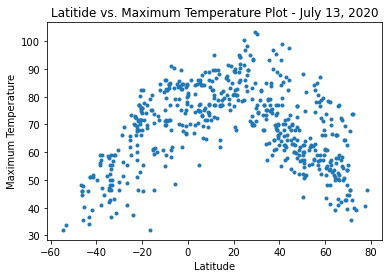

In [22]:
## Latitude vs. Temperature Plot
x_lat = city_df['Latitude']
y_temp = city_df['Maximum Temperature']
plt.scatter(x_lat, y_temp, marker='.')
plt.title('Latitide vs. Maximum Temperature Plot - July 13, 2020')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig('graphs/LatitudeMaxTempScatterPlot.png')

## Latitude vs. Humidity Plot

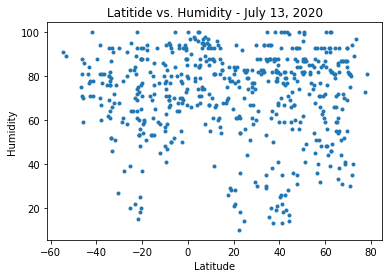

In [16]:
x_lat = city_df['Latitude']
y_hum = city_df['Humidity']
plt.scatter(x_lat, y_hum, marker='.')
plt.title('Latitide vs. Humidity - July 13, 2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('graphs/LatitudeHumidityScatterPlot.png')

## Latitude vs. Cloudiness Plot

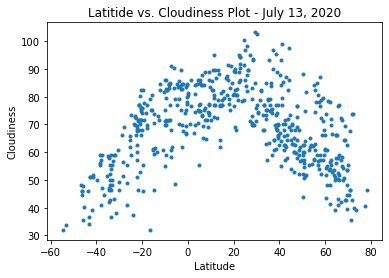

In [17]:
x_lat = city_df['Latitude']
y_cloud = city_df['Cloudiness']
plt.scatter(x_lat, y_temp, marker='.')
plt.title('Latitide vs. Cloudiness Plot - July 13, 2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('graphs/LatitudeCloudinessScatterPlot.png')

## Latitude vs. Wind Speed Plot

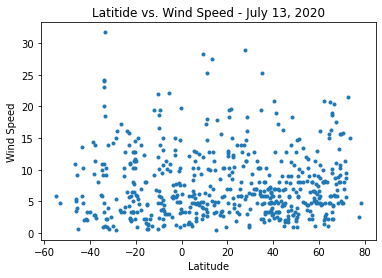

In [21]:
x_lat = city_df['Latitude']
y_wind = city_df['Wind Speed']
plt.scatter(x_lat, y_wind, marker='.')
plt.title('Latitide vs. Wind Speed - July 13, 2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('graphs/LatitudeWindSpeedScatterPlot.png')

## Linear Regression

In [35]:
# OPTIONAL: Create a function to create Linear Regression plots

In [41]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi_df = city_df[city_df['Latitude'] >= 0]
n_hemi_df.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arman',59.70,150.17,66.13,59,{'all': 98},7.47,RU,1594704243
4,Esim,4.87,-2.24,75.00,84,{'all': 63},10.27,GH,1594704244
5,Upernavik,72.79,-56.15,39.88,89,{'all': 100},21.52,GL,1594704244
8,Butaritari,3.07,172.79,81.03,78,{'all': 97},12.19,KI,1594704244
10,Cabo San Lucas,22.89,-109.91,86.00,54,{'all': 25},4.00,MX,1594704151


In [43]:
s_hemi_df = city_df[city_df['Latitude'] <= 0]
s_hemi_df.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,Ushuaia,-54.80,-68.30,32.00,91,{'all': 40},5.82,AR,1594704133
2,Cape Town,-33.93,18.42,52.00,61,{'all': 40},4.70,ZA,1594704226
3,Rikitea,-23.12,-134.97,72.91,84,{'all': 100},15.84,PF,1594704185
6,Port Alfred,-33.59,26.89,54.09,52,{'all': 35},31.72,ZA,1594704244
7,Saint-Philippe,-21.36,55.77,77.00,53,{'all': 66},3.36,RE,1594704006


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

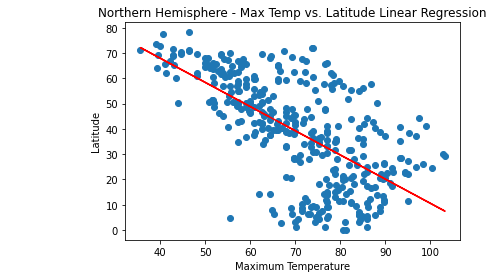

In [63]:
x_max_temp = np.array(n_hemi_df['Maximum Temperature'])
y_lat = np.array(n_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_max_temp, y_lat)
regress_values = x_max_temp * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_max_temp,y_lat)
plt.plot(x_max_temp,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('NorthernMaxTempLatitudeLinearRegression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

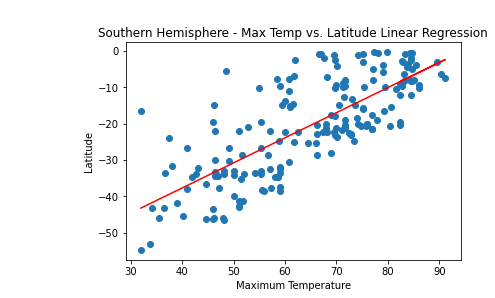

In [64]:
x_max_temp = np.array(s_hemi_df['Maximum Temperature'])
y_lat = np.array(s_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_max_temp, y_lat)
regress_values = x_max_temp * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_max_temp,y_lat)
plt.plot(x_max_temp,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('SouthernMaxTempLatitudeLinearRegression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

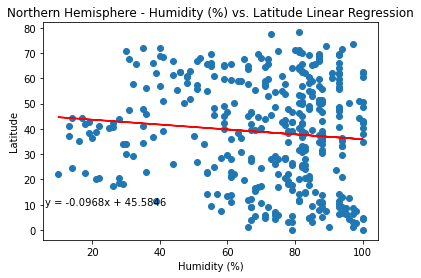

In [71]:
x_hum = np.array(n_hemi_df['Humidity'])
y_lat = np.array(n_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_hum, y_lat)
regress_values = x_hum * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_hum,y_lat)
plt.plot(x_hum,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.savefig('NorthernHumidityLatitudeLinearRegression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

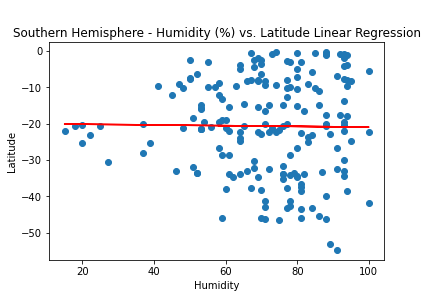

In [83]:
x_ = np.array(s_hemi_df['Humidity'])
y_lat = np.array(s_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_hum, y_lat)
regress_values = x_hum * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_hum,y_lat)
plt.plot(x_hum,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.savefig('SouthernHumidityLatitudeLinearRegression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

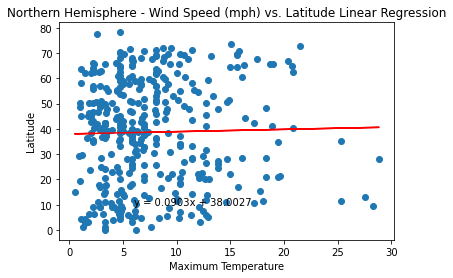

In [84]:
x_wind = np.array(n_hemi_df['Wind Speed'])
y_lat = np.array(n_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_wind, y_lat)
regress_values = x_wind * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_wind,y_lat)
plt.plot(x_wind,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('NorthernWindSpeedLatitudeLinearRegression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

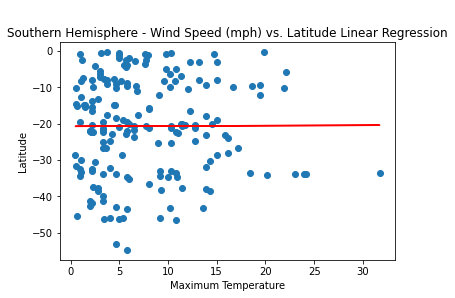

In [86]:
x_wind = np.array(s_hemi_df['Wind Speed'])
y_lat = np.array(s_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_wind, y_lat)
regress_values = x_wind * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_wind,y_lat)
plt.plot(x_wind,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('SouthernWindSpeedLatitudeLinearRegression.png')